Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0454 - val_loss: 0.1088
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - val_loss: 0.0269
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3525e-04 - val_loss: 0.0038
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6847e-04 - val_loss: 0.0041
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4592e-04 - val_loss: 0.0027
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9299e-05 - val_loss: 0.0027
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2246e-05 - val_loss: 0.0024
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6455e-05 - val_loss: 0.0022
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1780e-05 - val_loss: 0.0018
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8224e-05 - val_loss

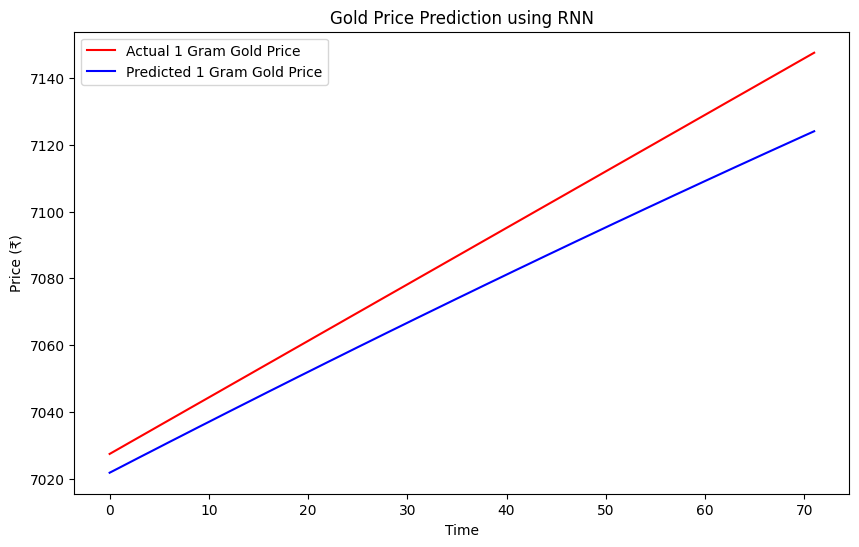

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('/content/gold_prices_daily_past_5_years.csv')  # Replace with the actual path to your dataset

# Convert the date column to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Drop the 'Date' column, assuming we're only interested in the prices
data = data[['1 Gram Price (₹)', '8 Grams Price (₹)', '10 Gram Price (₹)']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for RNN model
def create_sequences(data, time_step=5):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])  # Predicting the 1-gram price
    return np.array(X), np.array(y)

# Define the time step (the number of previous days used for prediction)
time_step = 5

# Create sequences from the scaled data
X, y = create_sequences(scaled_data, time_step)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))  # Output layer for 1-gram price prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and actual prices
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], 2))], axis=1))[:, 0]
actual_prices = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 2))], axis=1))[:, 0]

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='red', label='Actual 1 Gram Gold Price')
plt.plot(predicted_prices, color='blue', label='Predicted 1 Gram Gold Price')
plt.title('Gold Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price (₹)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predicted and actual prices
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], 2))], axis=1))[:, 0]
actual_prices = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 2))], axis=1))[:, 0]

# Calculate the R² score
r2 = r2_score(actual_prices, predicted_prices)
print(f"R² Score: {r2:.4f}")

# You can also calculate other regression metrics like MSE or MAE if needed:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
R² Score: 0.8318
MSE: 208.2161
MAE: 13.4384
RMSE: 14.4297


In [ ]:
model.save('mk.h5')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import datetime as dt
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/gold_prices_daily_past_5_years.csv')  # Replace with the actual path to your dataset

# Convert the date column to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Drop the 'Date' column, assuming we're only interested in the prices
data = data[['1 Gram Price (₹)', '8 Grams Price (₹)', '10 Gram Price (₹)']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for RNN model
def create_sequences(data, time_step=5):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])  # Predicting the 1-gram price
    return np.array(X), np.array(y)

# Define the time step (the number of previous days used for prediction)
time_step = 5

# Create sequences from the scaled data
X, y = create_sequences(scaled_data, time_step)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))  # Output layer for 1-gram price prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Function to predict future prices
def predict_future_prices(model, data, future_days, time_step):
    predictions = []
    last_sequence = data[-time_step:].reshape(1, time_step, data.shape[1])

    for _ in range(future_days):
        predicted_price = model.predict(last_sequence)
        predictions.append(predicted_price[0][0])
        last_sequence = np.append(last_sequence[:, 1:, :], [[predicted_price]], axis=1)

    return predictions

# Get the user input for the future date
future_date_input = input("Enter the future date for prediction (YYYY/MM/DD): ")
future_date = dt.datetime.strptime(future_date_input, '%Y/%m/%d')
today = dt.datetime.now()

# Calculate how many days into the future we need to predict
future_days = (future_date - today).days

# Predict future gold prices from today to the future date
predicted_scaled_prices = predict_future_prices(model, scaled_data, future_days, time_step)

# Inverse transform the predicted prices back to the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_scaled_prices).reshape(-1, 1))

# Get the user input for the number of grams
grams = float(input("Enter the amount in grams (1, 8, 10, etc.): "))

# Output the predicted price for the last day (future date) for the entered grams
predicted_price_for_grams = predicted_prices[-1][0] * grams
print(f"Predicted Gold Price on {future_date.date()} for {grams} grams: ₹{predicted_price_for_grams:.2f}")

# Plot the predicted prices
dates = pd.date_range(start=today, periods=future_days)
plt.figure(figsize=(10, 6))
plt.plot(dates, predicted_prices, color='blue', label='Predicted 1 Gram Gold Price')
plt.title('Gold Price Prediction from Current Date to User-Entered Future Date')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.1476 - val_loss: 0.2161
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - val_loss: 5.4369e-04
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - val_loss: 3.0725e-04
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - val_loss: 0.0169
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - val_loss: 3.6932e-04
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1715e-04 - val_loss: 0.0029
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.9331e-04 - val_loss: 0.0064
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1818e-04 - val_loss: 0.0026
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8613e-05 - val_loss: 0.0015
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6677e-05 - val_loss: 0.0024
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4831e-05 - val_loss: 0.0025
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1150e-05 - 

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import datetime as dt
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/gold_prices_daily_past_5_years.csv')  # Replace with the actual path to your dataset

# Convert the date column to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Drop the 'Date' column, assuming we're only interested in the prices
data = data[['1 Gram Price (₹)', '8 Grams Price (₹)', '10 Gram Price (₹)']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for RNN model
def create_sequences(data, time_step=5):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])  # Predicting the 1-gram price
    return np.array(X), np.array(y)

# Define the time step (the number of previous days used for prediction)
time_step = 5

# Create sequences from the scaled data
X, y = create_sequences(scaled_data, time_step)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))  # Output layer for 1-gram price prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Function to predict future prices
def predict_future_prices(model, data, future_days, time_step):
    predictions = []
    last_sequence = data[-time_step:].reshape(1, time_step, data.shape[1])  # Ensure 3D shape

    for _ in range(future_days):
        predicted_price = model.predict(last_sequence)
        predictions.append(predicted_price[0][0])  # Extracting predicted price for 1 gram

        # Create a new sequence with the predicted 1-gram price and placeholder values for 8 and 10 grams
        new_sequence = np.array([[predicted_price[0][0], 0, 0]])  # Maintain the 3 features

        # Reshape the new sequence to 3D and concatenate
        new_sequence_reshaped = new_sequence.reshape(1, 1, data.shape[1])

        # Update last_sequence by removing the first time step and adding new prediction
        last_sequence = np.concatenate([last_sequence[:, 1:, :], new_sequence_reshaped], axis=1)

    return predictions


# Get the user input for the future date
future_date_input = input("Enter the future date for prediction (YYYY-MM-DD): ")  # Changed format to match input
future_date = dt.datetime.strptime(future_date_input, '%Y-%m-%d')  # Adjusted to '%Y-%m-%d'
today = dt.datetime.now()

# Calculate how many days into the future we need to predict
future_days = (future_date - today).days

# Predict future gold prices from today to the future date
predicted_scaled_prices = predict_future_prices(model, scaled_data, future_days, time_step)

# Inverse transform the predicted prices back to the original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_scaled_prices).reshape(-1, 1))

# Get the user input for the number of grams
grams = float(input("Enter the amount in grams (1, 8, 10, etc.): "))

# Output the predicted price for the last day (future date) for the entered grams
predicted_price_for_grams = predicted_prices[-1][0] * grams
print(f"Predicted Gold Price on {future_date.date()} for {grams} grams: ₹{predicted_price_for_grams:.2f}")

# Plot the predicted prices
dates = pd.date_range(start=today, periods=future_days)
plt.figure(figsize=(10, 6))
plt.plot(dates, predicted_prices, color='blue', label='Predicted 1 Gram Gold Price')
plt.title('Gold Price Prediction from Current Date to User-Entered Future Date')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0988 - val_loss: 0.1792
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0163 - val_loss: 0.0064
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - val_loss: 0.0050
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0268
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - val_loss: 0.0117
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.8047e-04 - val_loss: 0.0105
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2692e-04 - val_loss: 0.0113
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9970e-04 - val_loss: 0.0087
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0388e-04 - val_loss: 0.0078
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4329e-04 - val_loss: 0.0067
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3059e-04 - val_loss: 0.0066
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4385e-04 - val

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2588
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0387
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0118
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0115
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0097
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0055
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0049
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0052
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0040
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0034
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0047
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0038
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0043
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0037
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0040
Epoch 16/100
8/8 ━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step


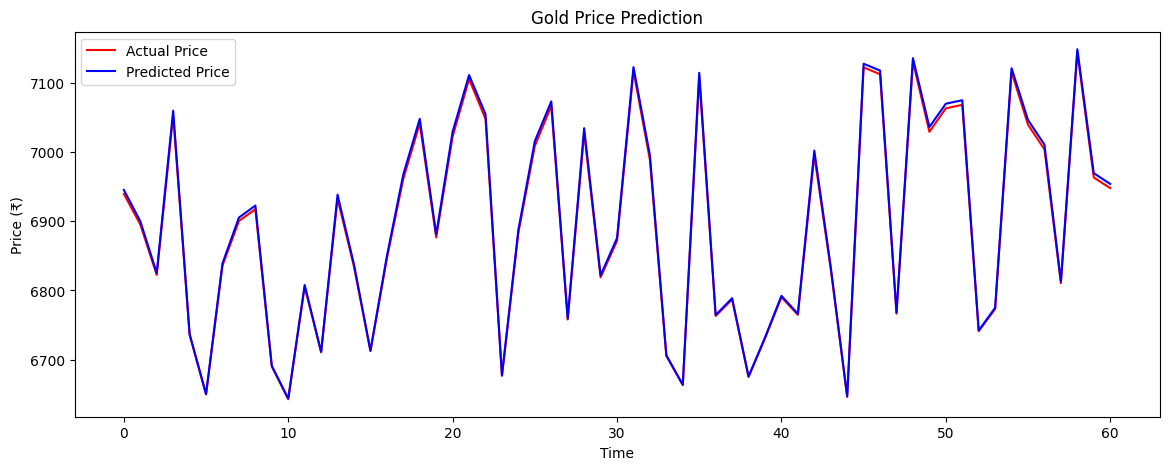

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Future prediction for the next day: 7154.7046


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# 1. Load the Data
# Assuming your data is in a CSV file called 'gold_prices.csv'
# Example CSV format:
# Date,1 Gram Price (₹),8 Grams Price (₹),10 Gram Price (₹)
data = pd.read_csv('/content/gold_prices_daily_past_5_years.csv')

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# 2. Preprocess Data
# We will use the '1 Gram Price (₹)' for prediction
prices = data['1 Gram Price (₹)'].values.reshape(-1, 1)

# Normalize the prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# 3. Create Sequences
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Set time step (number of previous days to consider for prediction)
time_step = 60
X, y = create_dataset(scaled_prices, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# 7. Evaluate the Model
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
actual_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(actual_price, color='red', label='Actual Price')
plt.plot(predicted_price, color='blue', label='Predicted Price')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price (₹)')
plt.legend()
plt.show()

# 8. Make Future Predictions
# You can make future predictions based on the last `time_step` prices
last_prices = scaled_prices[-time_step:].reshape(1, time_step, 1)
future_prediction = model.predict(last_prices)
future_prediction = scaler.inverse_transform(future_prediction)

print("Future prediction for the next day:", future_prediction[0][0])


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(scaled_data) * 0.8)
test_data = scaled_data[train_size - time_step:, :]

# Create test sequences using the past 60 days
X_test, y_test = create_sequences(test_data, time_step)

# Reshape X_test
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Predict on the test set
predictions = model.predict(X_test)

# Inverse scaling
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
Mean Squared Error (MSE): 37.70088902652192
Root Mean Squared Error (RMSE): 6.14010496868921
Mean Absolute Error (MAE): 5.978190550085644


In [ ]:
# Calculate scores based on RMSE
score = 1 - (rmse / base_error)

# Ensure the score is within the range of 0 to 1
score = max(0, min(score, 1))

# Print the score
print(f'Model Score (out of 1): {score:.4f}')


Model Score (out of 1): 0.9991


In [ ]:
# Define a base error (e.g., mean of actual test values)
base_error = np.mean(y_test_rescaled)

# Calculate scores based on RMSE
score = 100 - (rmse / base_error * 100)

# Ensure the score is within the range of 0 to 100
score = max(0, min(score, 100))

# Print the score
print(f'Model Score (out of 100): {score:.2f}')


Model Score (out of 100): 99.91


Enter the start date (YYYY-MM-DD): 2023-10-10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

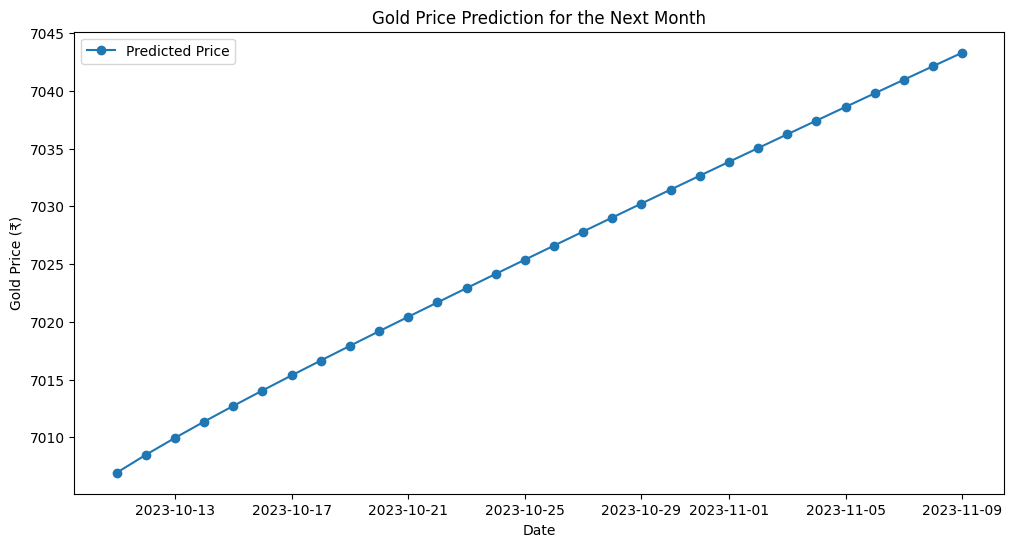

In [ ]:
# Predict for 1 month (30 days) starting from a user-provided date
def predict_for_next_month(model, data, start_date, time_step, scaler, num_days=30):
    # Get the last 60 days of data prior to the start date
    if start_date not in data.index:
        raise ValueError("Start date not found in the dataset.")

    start_idx = data.index.get_loc(start_date)

    if start_idx < time_step:
        raise ValueError("Not enough historical data to make predictions.")

    last_sequence = data.iloc[start_idx - time_step:start_idx]['1 Gram Price (₹)'].values
    last_sequence = scaler.transform(last_sequence.reshape(-1, 1))

    predicted_prices = []

    # Iteratively predict the next day's price for 30 days
    for _ in range(num_days):
        X_input = last_sequence.reshape((1, time_step, 1))
        predicted_price = model.predict(X_input)
        predicted_price_rescaled = scaler.inverse_transform(predicted_price)
        predicted_prices.append(predicted_price_rescaled[0, 0])

        # Update the last sequence to include the predicted price
        last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

    # Create date range for the predictions
    future_dates = pd.date_range(start=start_date + pd.Timedelta(days=1), periods=num_days)

    # Return predicted prices along with future dates
    return pd.DataFrame({'Date': future_dates, 'Predicted Price (₹)': predicted_prices})

# User input
user_start_date = input("Enter the start date (YYYY-MM-DD): ")
user_start_date = pd.to_datetime(user_start_date)

# Predict the next 30 days of gold prices from the user's entered date
predictions = predict_for_next_month(model, data, user_start_date, time_step, scaler, num_days=30)

# Print the results
print(predictions)

# Plot the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predictions['Date'], predictions['Predicted Price (₹)'], marker='o', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Gold Price (₹)')
plt.title('Gold Price Prediction for the Next Month')
plt.legend()
plt.show()


In [ ]:
import datetime as dt

Enter the end date (YYYY-MM-DD): 2024-12-31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

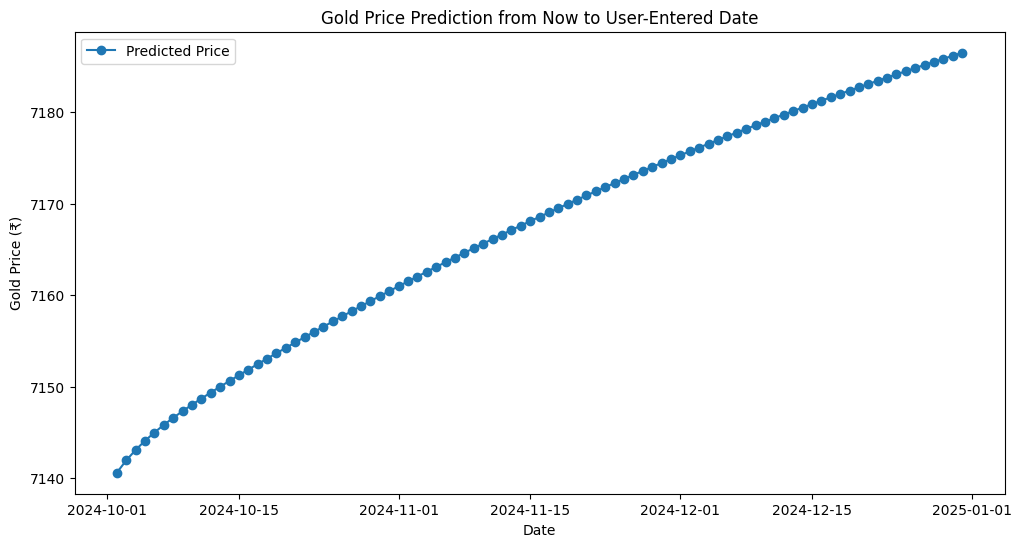

In [ ]:
def predict_until_date(model, data, start_date, end_date, time_step, scaler):
    # Find the closest date before the start date in the dataset
    closest_date = data.index[data.index <= start_date][-1]

    start_idx = data.index.get_loc(closest_date)

    if start_idx < time_step:
        raise ValueError("Not enough historical data to make predictions.")

    last_sequence = data.iloc[start_idx - time_step:start_idx]['1 Gram Price (₹)'].values
    last_sequence = scaler.transform(last_sequence.reshape(-1, 1))

    # Calculate the number of days to predict
    num_days = (end_date - start_date).days

    predicted_prices = []

    # Iteratively predict the next day's price until the user-entered end date
    for _ in range(num_days):
        X_input = last_sequence.reshape((1, time_step, 1))
        predicted_price = model.predict(X_input)
        predicted_price_rescaled = scaler.inverse_transform(predicted_price)
        predicted_prices.append(predicted_price_rescaled[0, 0])

        # Update the last sequence to include the predicted price
        last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

    # Create date range for the predictions
    future_dates = pd.date_range(start=start_date + pd.Timedelta(days=1), periods=num_days)

    # Return predicted prices along with future dates
    return pd.DataFrame({'Date': future_dates, 'Predicted Price (₹)': predicted_prices})

# Get the current date and user input date
now_date = pd.to_datetime(dt.datetime.now().date())
user_end_date = input("Enter the end date (YYYY-MM-DD): ")
user_end_date = pd.to_datetime(user_end_date)

# Ensure the user end date is after today
if user_end_date <= now_date:
    raise ValueError("End date must be after today.")

# Predict the gold prices from today until the user-entered date
predictions = predict_until_date(model, data, now_date, user_end_date, time_step, scaler)

# Print the results
print(predictions)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(predictions['Date'], predictions['Predicted Price (₹)'], marker='o', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Gold Price (₹)')
plt.title('Gold Price Prediction from Now to User-Entered Date')
plt.legend()
plt.show()

Enter the end date (YYYY-MM-DD): 2024-10-10
Enter the number of grams for prediction: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
        Date  Predicted Price (₹)
0 2024-10-02         21421.804688
1 2024-10-03         21425.834473
2 2024-10-04         21429.266602
3 2024-10-05         21432.279785
4 2024-10-06         21434.989746
5 2024-10-07         21437.475586
6 2024-10-08         21439.794434
7 2024-10-09         21441.990234
8 2024-10-10         21444.090820


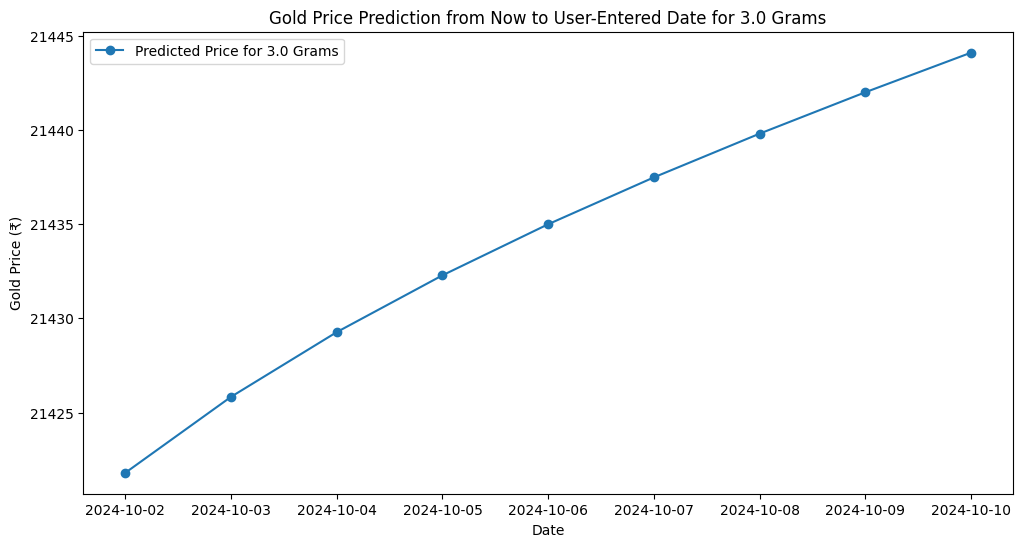

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

def predict_until_date(model, data, start_date, end_date, time_step, scaler, grams):
    # Find the closest date before the start date in the dataset
    closest_date = data.index[data.index <= start_date][-1]
    start_idx = data.index.get_loc(closest_date)

    if start_idx < time_step:
        raise ValueError("Not enough historical data to make predictions.")

    last_sequence = data.iloc[start_idx - time_step:start_idx]['1 Gram Price (₹)'].values
    last_sequence = scaler.transform(last_sequence.reshape(-1, 1))

    # Calculate the number of days to predict
    num_days = (end_date - start_date).days

    predicted_prices = []

    # Iteratively predict the next day's price until the user-entered end date
    for _ in range(num_days):
        X_input = last_sequence.reshape((1, time_step, 1))
        predicted_price = model.predict(X_input)
        predicted_price_rescaled = scaler.inverse_transform(predicted_price)

        # Scale the predicted price based on user input for grams
        predicted_price_for_grams = predicted_price_rescaled[0, 0] * grams
        predicted_prices.append(predicted_price_for_grams)

        # Update the last sequence to include the predicted price
        last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

    # Create date range for the predictions
    future_dates = pd.date_range(start=start_date + pd.Timedelta(days=1), periods=num_days)

    # Return predicted prices along with future dates
    return pd.DataFrame({'Date': future_dates, 'Predicted Price (₹)': predicted_prices})

# Get the current date and user input date
now_date = pd.to_datetime(dt.datetime.now().date())
user_end_date = input("Enter the end date (YYYY-MM-DD): ")
user_end_date = pd.to_datetime(user_end_date)

# Ensure the user end date is after today
if user_end_date <= now_date:
    raise ValueError("End date must be after today.")

# User input for the number of grams
grams = float(input("Enter the number of grams for prediction: "))

# Predict the gold prices from today until the user-entered date
predictions = predict_until_date(model, data, now_date, user_end_date, time_step, scaler, grams)

# Print the results
print(predictions)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(predictions['Date'], predictions['Predicted Price (₹)'], marker='o', label='Predicted Price for {} Grams'.format(grams))
plt.xlabel('Date')
plt.ylabel('Gold Price (₹)')
plt.title('Gold Price Prediction from Now to User-Entered Date for {} Grams'.format(grams))
plt.legend()
plt.show()


Enter the end date (YYYY-MM-DD): 2024-10-10
Enter the number of grams for prediction: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
        Date  Predicted Price (₹)
0 2024-10-02         71406.015625
1 2024-10-03         71419.448242
2 2024-10-04         71430.888672
3 2024-10-05         71440.932617
4 2024-10-06         71449.965820
5 2024-10-07         71458.251953
6 2024-10-08         71465.981445
7 2024-10-09         71473.300781
8 2024-10-10         71480.302734


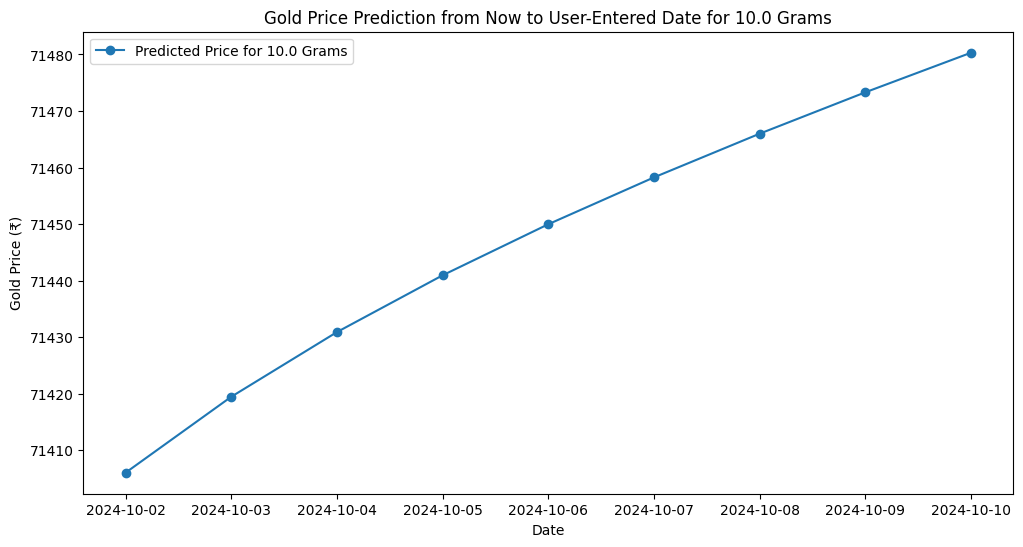

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

def predict_until_date(model, data, start_date, end_date, time_step, scaler, grams):
    # Find the closest date before the start date in the dataset
    closest_date = data.index[data.index <= start_date][-1]
    start_idx = data.index.get_loc(closest_date)

    if start_idx < time_step:
        raise ValueError("Not enough historical data to make predictions.")

    last_sequence = data.iloc[start_idx - time_step:start_idx]['1 Gram Price (₹)'].values
    last_sequence = scaler.transform(last_sequence.reshape(-1, 1))

    # Calculate the number of days to predict
    num_days = (end_date - start_date).days

    predicted_prices = []

    # Iteratively predict the next day's price until the user-entered end date
    for _ in range(num_days):
        X_input = last_sequence.reshape((1, time_step, 1))
        predicted_price = model.predict(X_input)
        predicted_price_rescaled = scaler.inverse_transform(predicted_price)

        # Scale the predicted price based on user input for grams
        predicted_price_for_grams = predicted_price_rescaled[0, 0] * grams
        predicted_prices.append(predicted_price_for_grams)

        # Update the last sequence to include the predicted price
        last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

    # Create date range for the predictions
    future_dates = pd.date_range(start=start_date + pd.Timedelta(days=1), periods=num_days)

    # Return predicted prices along with future dates
    return pd.DataFrame({'Date': future_dates, 'Predicted Price (₹)': predicted_prices})

# Get the current date and user input date
now_date = pd.to_datetime(dt.datetime.now().date())
user_end_date = input("Enter the end date (YYYY-MM-DD): ")
user_end_date = pd.to_datetime(user_end_date)

# Ensure the user end date is after today
if user_end_date <= now_date:
    raise ValueError("End date must be after today.")

# User input for the number of grams
grams = float(input("Enter the number of grams for prediction: "))

# Predict the gold prices from today until the user-entered date
predictions = predict_until_date(model, data, now_date, user_end_date, time_step, scaler, grams)

# Print the results
print(predictions)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(predictions['Date'], predictions['Predicted Price (₹)'], marker='o', label='Predicted Price for {} Grams'.format(grams))
plt.xlabel('Date')
plt.ylabel('Gold Price (₹)')
plt.title('Gold Price Prediction from Now to User-Entered Date for {} Grams'.format(grams))
plt.legend()
plt.show()


In [ ]:
model.save('gold_price_prediction_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load your existing model (if in H5 format)
model = load_model('/content/gold_price_prediction_model.h5')

# Save the model in the new format
model.save('gold_price_prediction_model.keras')
